In [1]:
%run radiomorpho.py

import skimage.feature # local binary patterns and other possibly useful stuff
import skimage.transform
import warnings; warnings.simplefilter('ignore')

In [2]:
dirs = ('101first_fit', '101nvss_fit')
files, images = readImagesFromDirs(dirs)

error reading image 101first_fit/J0331-2849_z1.0890p_1.09Mpc.fi.fit or 101nvss_fit/J0331-2849_z1.0890p_1.09Mpc.nv.fit


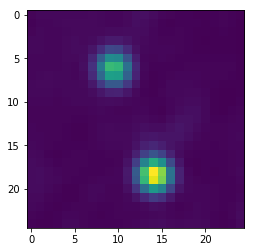

In [3]:
img = images[:,1][13]
plt.imshow(img); plt.show()

In [4]:
lbp = skimage.feature.local_binary_pattern(img, 4, 2)
lbp.shape

(25, 25)

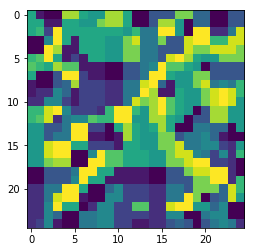

In [5]:
plt.imshow(lbp)

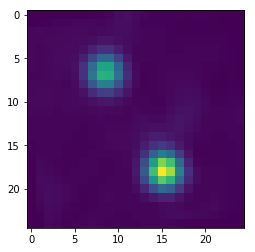

In [6]:
img2 = skimage.transform.rotate(img, 10)
plt.imshow(img2)

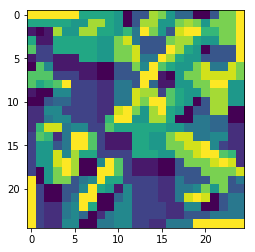

In [7]:
lbp2 = skimage.feature.local_binary_pattern(img2, 4, 2)
plt.imshow(lbp2)

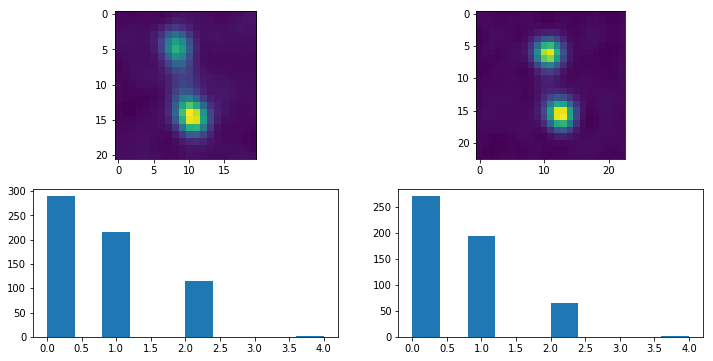

In [8]:
n, r,  = 100, 2
# img2 = skimage.transform.rotate(img, 90)
img1 = images[:,1][44]
img2 = images[:,1][45]
lbp = skimage.feature.local_binary_pattern(img, 4, 16, method='uniform')
lbp2 = skimage.feature.local_binary_pattern(img2, 4, 16, method='uniform')

f, ax = plt.subplots(2, 2, figsize=(12,6))
# ax[0].imshow(lbp , cmap='gray')
# ax[1].imshow(lbp2, cmap='gray')

ax[0][0].imshow(img1)
ax[0][1].imshow(img2)
ax[1][0].hist(lbp.ravel())
ax[1][1].hist(lbp2.ravel())
plt.show()

In [9]:
def get_lbp_hist(img):
    lbp = skimage.feature.local_binary_pattern(img, 4, 16, method='uniform')
    return sk.exposure.histogram(lbp)[0]

In [10]:
data = []
for img in images[:, 1]:
    data.append( get_lbp_hist(img) )
data = np.array(data)

In [11]:
from sklearn import decomposition

In [12]:
pca = decomposition.PCA(n_components=2)
pca.fit(data)
Y = pca.transform(data)
xs, ys = Y[:,0] , Y[:,1]

In [13]:
np.sum(pca.explained_variance_ratio_)

0.9571144079761612

In [14]:
from matplotlib import offsetbox
def plot_embedding(X, Y, title=None, space = 0.04, figsize=(16, 7)):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1])

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(Y.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < space:
#                 don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            f2 = Y[i]
            scale_fac = (20/f2.shape[0] , 20/f2.shape[1])
            img = sk.transform.rescale(f2, scale_fac, mode='reflect', multichannel=False, anti_aliasing=True)
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(img, cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

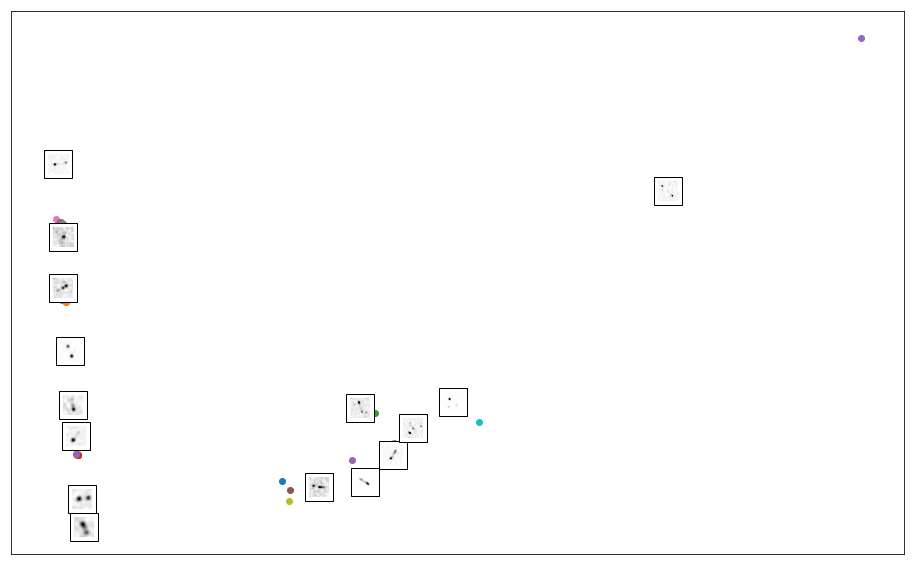

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plot_embedding(Y, images[:, 1] , space = 0.003, figsize=(16, 10))

In [16]:
from skimage.filters import threshold_otsu

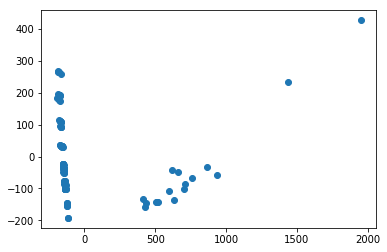

In [17]:
plt.scatter(Y[:,0], Y[:,1])

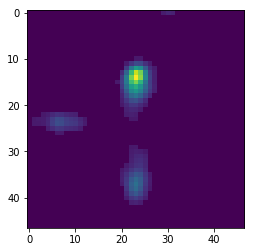

In [18]:
f_img = remove_data_bellow_threshold(img)
plt.imshow(f_img)

In [19]:
data2 = []
for img in images[:, 1]:
    f_img = remove_data_bellow_threshold(img)
    data2.append( get_lbp_hist(f_img) )
data2 = np.array(data2)

In [20]:
pca = decomposition.PCA(n_components=2)
pca.fit(data2)
Y = pca.transform(data2)
xs, ys = Y[:,0] , Y[:,1]
pca.explained_variance_ratio_

array([0.99753423, 0.00238477])

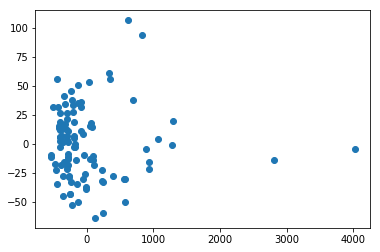

In [21]:
plt.scatter(Y[:,0], Y[:,1])

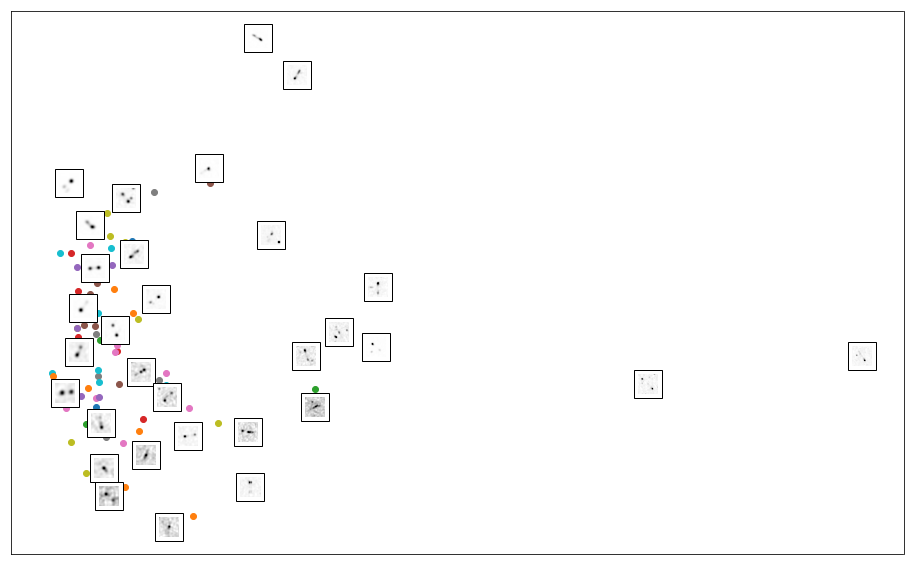

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plot_embedding(Y, images[:, 1] , space = 0.003, figsize=(16, 10))